# Cat Versus Dog Images classification

**Data visualisation and shape**

In [97]:
from matplotlib import pyplot as plt 
from os.path import join
from os import listdir

my_path = r"C:\Users\anton\Downloads\dogs-vs-cats"
dataset_path = join(my_path,"train","train")

train_files = listdir(dataset_path)

print( train_files )

print("Nb of files:", len(train_files))


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

**List of dogs and cat files**

In [98]:
list_cat = [fname for fname in train_files if fname[0]=="c"]
list_dog = [fname for fname in train_files if fname[0]=="d"]

print("nb cat", len(list_cat))
print("nb dog", len(list_dog))

Nb_Images = len(list_cat)

nb cat 12500
nb dog 12500


**plot quelques images**

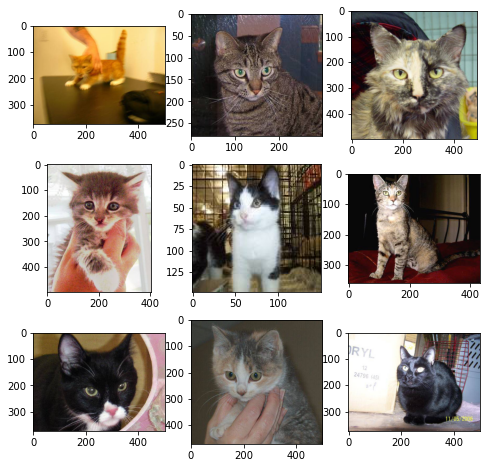

In [99]:
plt.figure(figsize=(8,8))
for ind, filename in enumerate(train_files[:9]):
	plt.subplot(3,3,1 + ind)
	img = plt.imread(join(dataset_path,filename))
	plt.imshow(img)


**Combien de RAM cela va prendre**

(200, 200, 3)


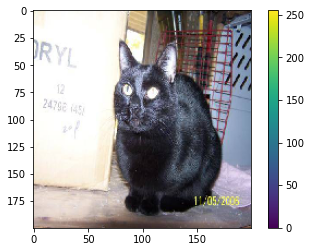

In [100]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import asarray

img_test = load_img(join(dataset_path, filename), target_size=(200, 200))

size_img = asarray(img_test).shape

plt.imshow(img_test)
plt.colorbar()
print(size_img)

In [101]:
from numpy import prod
taille = prod(size_img) * 4.0 * 25000.0 / (1024**3)
print(taille)

11.175870895385742


**La quantité de RAM nécessaire pour stocker 25 000 images avec 200x200x3 pixels (mode couleur RGB) :**

* Calculez le nombre total de pixels dans chaque image :

```
Nombre de pixels par image = (200 pixels) x (200 pixels) x 3 canaux de couleurs = 120 000 pixels
```

* Multipliez le nombre de pixels par image par le nombre total d'images pour trouver le nombre total de pixels :

```
Pixels totaux = 120 000 pixels/image x 25 000 images = 3 000 000 000 pixels
```

* En supposant que chaque pixel dans une array numpy (float32) est représenté par 32 bits (4 octets), multipliez le nombre total de pixels par 4 pour trouver le nombre total d'octets requis :

```
Octets totaux = 3 000 000 000 pixels x 4 octets/pixel = 12 000 000 000 octets
```

4. Convertissez le nombre total d'octets en Go en le divisant par 1024^3 :

```
RAM totale requise = 12 000 000 000 octets / (1024^3) = 11.175870895385742 Go
```

Environ 11,18 Go de RAM pour stocker toutes les images. 
Si vous exécutez également d'autres programmes ou applications en même temps, vous devrez peut-être disposer de plus de RAM.

Quelques lignes pour vous guider: 

* la fonction load_img de keras est utile pour charger les données et leur donner la taille que l'on souhaite
* la fonction img_to_array est utile pour transformer une image en array
* https://keras.io/api/data_loading/image/

> Image data loading (1ère ligne de la page) 

On va alors copier les fichiers dogs/cats dans un dossier dataset. 
On garde 25% pour le test que l'on va choisir aléatoirement.

In [102]:

# dataset
# │
# ├── test
# │   ├── cats
# │   │   ├── cat_image1.jpg
# │   │   ├── cat_image2.jpg
# │   │   └── ...
# │   └── dogs
# │       ├── dog_image1.jpg
# │       ├── dog_image2.jpg
# │       └── ...
# │
# └── train
#     ├── cats
#     │   ├── cat_image1.jpg
#     │   ├── cat_image2.jpg
#     │   └── ...
#     └── dogs
#         ├── dog_image1.jpg
#         ├── dog_image2.jpg
#         └── ...


In [103]:
# On crée les dossiers
from os import makedirs

dataset_path_target = join(my_path,'dataset/')
subdirs = ['train/', 'test/']
# on va créer train et test
for subdir in subdirs:
	# on crée dogs and cats dans les deux dossier train et test
	rep_dog_cat = ['dogs/', 'cats/']
	for rep_name in rep_dog_cat:
		rep_path = join(dataset_path_target, subdir, rep_name)
		makedirs(rep_path, exist_ok=True)

In [104]:
from numpy.random import permutation
from numpy import arange 
test_ratio = 0.25
indices_l = int(Nb_Images*test_ratio)
print("test size: ", indices_l)

index_cat = permutation(arange(Nb_Images))[:indices_l]
index_dog = permutation(arange(Nb_Images))[:indices_l]

index_cat



test size:  3125


array([ 9662, 12002,  4513, ...,  8686,  8740, 11902])

In [105]:
from shutil import copyfile

if not listdir(join(dataset_path_target, "train", 'cats')):
	def in_test(ind, index_cd):
		type_dir = 'train'
		if ind in index_cd:
			type_dir = 'test'
		return type_dir


	for ind, fichier in enumerate(list_cat):
		src = join(dataset_path, fichier)
		# petite précaution au cas où
		if fichier.startswith('cat'):
			type_dir = in_test(ind, index_cat)
			target = join(dataset_path_target, type_dir, 'cats', fichier)
			copyfile(src, target)

	for ind, fichier in enumerate(list_dog):		
		src = join(dataset_path, fichier)
		# petite précaution au cas où
		if fichier.startswith('dog'):
			type_dir = in_test(ind, index_dog)
			target = join(dataset_path_target, type_dir, 'dogs', fichier)
			copyfile(src, target)


In [106]:

# vérification
print("Cats")
print("train: ", len( listdir( join(dataset_path_target, "train", 'cats'))))
print("test: ", len( listdir( join(dataset_path_target, "test", 'cats'))))

print("Dogs")
print("train: ", len( listdir( join(dataset_path_target, "train", 'dogs'))))
print("test: ", len( listdir( join(dataset_path_target, "test", 'dogs'))))

Cats
train:  9375
test:  3125
Dogs
train:  9375
test:  3125


# CONVNET

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

Nepoch = 14
train = True

def my_model():
	# model
	model = Sequential()
	# input/hidden
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	# output
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

**Comment on va lire les fichiers au fur et a mesure?**

> https://letmegooglethat.com/?q=keras+flow+of+files+image+classification
>
> On se fait une lecture du premier lien vers un blog de keras... Surprise surprise little data 
>
> https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

**On prépare les itérateurs pour la lecture par flow**


In [108]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# create data generator avec normalisation des images
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [109]:
train_it = datagen.flow_from_directory( join(dataset_path_target,"train"),
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory( join(dataset_path_target,"test"),
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


In [110]:
# baseline model for the dogs vs cats dataset
import sys
from tensorflow.keras.saving import load_model
import json

model_name = 'convnet_dog_cat_1.keras'
hist_name = "history_1.json"
if model_name in listdir('.') and not train:

	model = load_model(model_name)

		
else:
		# notre model
	model = my_model()

	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=Nepoch, verbose=1)
      
	model.save(model_name)
	with open(hist_name, 'w') as f:
		json.dump(history.history, f)


Epoch 1/10


C:\Users\anton\AppData\Local\Temp\ipykernel_19764\466515416.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


 25/293 [=>............................] - ETA: 1:46 - loss: 3.3691 - accuracy: 0.5106

KeyboardInterrupt: 

In [ ]:

# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))


C:\Users\anton\AppData\Local\Temp\ipykernel_19764\2972557521.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 65.088


**Pour regarder les résultats on se fait une fonction qu'on pourra utiliser plus tard**

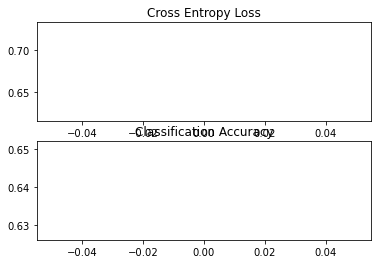

In [ ]:
import sys
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history['loss'], color='blue', label='train')
	plt.plot(history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history['accuracy'], color='blue', label='train')
	plt.plot(history['val_accuracy'], color='orange', label='test')
	# sauvegarde l'image
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	


with open(hist_name, 'r') as f:
	history = json.load(f)
summarize_diagnostics(history)	

`filename = sys.argv[0].split('/')[-1]` 

* extrait le nom du script Python en cours d'exécution à partir des arguments de la ligne de commande.
* sys.argv est une liste dans laquelle le premier élément (sys.argv[0]) est le nom du script lui-même.
* .split('/') divise le chemin du script en une liste en utilisant le caractère '/' comme séparateur.
* [-1] sélectionne le dernier élément de la liste, qui est le nom du script.

Supposons que le script soit exécuté à partir du chemin `/chemin/vers/votre/script.py`. 

Après l'exécution de cette ligne, filename contiendrait `script.py`. 

Cela permet de générer un nom de fichier pour l'image de la courbe d'apprentissage, par exemple `script_plot.png`.

# Meilleur Modèle

In [ ]:
from tensorflow.keras.layers import Dropout

def my_model_2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

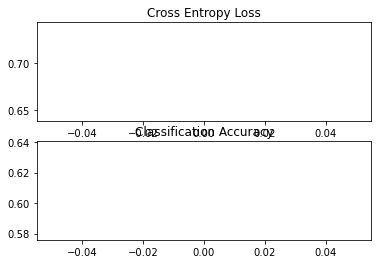

In [ ]:
model_name = 'convnet_dog_cat_2.keras'
hist_name = "history_2.json"
if model_name in listdir('.') and not train:

	model = load_model(model_name)

		
else:
		# notre model
	model = my_model_2()

	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=Nepoch, verbose=1)
      
	model.save(model_name)
	with open(hist_name, 'w') as f:
		json.dump(history.history, f)

with open(hist_name, 'r') as f:
	history = json.load(f)
summarize_diagnostics(history)

# Normalisation

In [ ]:
from tensorflow.keras.layers import LayerNormalization

def my_model_3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(LayerNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(LayerNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(LayerNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model



C:\Users\anton\AppData\Local\Temp\ipykernel_19764\2637174816.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


293/293 [==============================] - 411s 1s/step - loss: 0.9534 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000


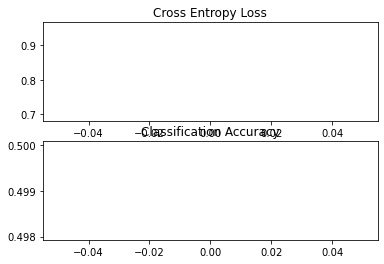

In [ ]:
model_name = 'convnet_dog_cat_3.keras'
hist_name = "history_3.json"
if model_name in listdir('.') and not train:
	model = load_model(model_name)

else:
		# notre model
	model = my_model_3()

	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=Nepoch, verbose=1)
      
	model.save(model_name)
	with open(hist_name, 'w') as f:
		json.dump(history.history, f)

with open(hist_name, 'r') as f:
	history = json.load(f)
summarize_diagnostics(history)

# Data Augmentation

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


C:\Users\anton\AppData\Local\Temp\ipykernel_19764\3558609560.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


293/293 [==============================] - 263s 895ms/step - loss: 0.7221 - accuracy: 0.5595 - val_loss: 0.6419 - val_accuracy: 0.6432


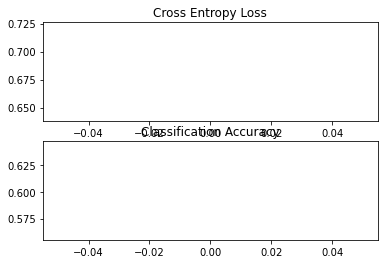

In [ ]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory(join(dataset_path_target,"train"),
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory(join(dataset_path_target,"test"),
	class_mode='binary', batch_size=64, target_size=(200, 200))

model_name = 'convnet_dog_cat_4.keras'
hist_name = "history_4.json"
if model_name in listdir('.') and not train:
	model = load_model(model_name)

else:
		# notre model
	model = my_model_2()

	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=Nepoch, verbose=1)
      
	model.save(model_name)
	with open(hist_name, 'w') as f:
		json.dump(history.history, f)

with open(hist_name, 'r') as f:
	history = json.load(f)
summarize_diagnostics(history)

# Transfer Learning

**VGG16** images 224 * 224 * 3

https://github.com/chainer/chainercv/blob/master/chainercv/links/model/vgg/vgg16.py

`# RGB order
_imagenet_mean = np.array(
    [123.68, 116.779, 103.939], dtype=np.float32)[:, np.newaxis, np.newaxi`

 > imagenet mean values pour le centrage

 >datagen.mean = [123.68, 116.779, 103.939]    

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model 

def my_model_vgg():
    # load VGG16 model mais on ne garde pas la couche de classification
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # on empeche les couches d'être entrainer 
    for layer in model.layers:
        layer.trainable = False
    # On utilise le mode fonctionel pour le nouveau modèle
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # On crée le modèle
    model = Model(inputs=model.inputs, outputs=output)
    
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Centrage celon Imagenet
datagen.mean = [123.68, 116.779, 103.939]

train_it = datagen.flow_from_directory(join(dataset_path_target,"train"), class_mode='binary', batch_size=64, target_size=(224, 224))

test_it = datagen.flow_from_directory(join(dataset_path_target,"test"), class_mode='binary', batch_size=64, target_size=(224, 224))

model_name = 'convnet_dog_cat_5.keras'
hist_name = "history_5.json"
if model_name in listdir('.') and not train:
	model = load_model(model_name)

else:
		# notre model
	model = my_model_vgg()

	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=Nepoch, verbose=1)
      
	model.save(model_name)
	with open(hist_name, 'w') as f:
		json.dump(history.history, f)

with open(hist_name, 'r') as f:
	history = json.load(f)
summarize_diagnostics(history)

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.
58889256/58889256 [==============================] - 2s 0us/step


C:\Users\anton\AppData\Local\Temp\ipykernel_19764\2916998902.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


 32/293 [==>...........................] - ETA: 10:12 - loss: 0.9068 - accuracy: 0.5806

KeyboardInterrupt: 